In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

%matplotlib inline

# 1. 逻辑回归公式小结

## 1.1 符号说明


* <font size=4>$x^{(i)}: 输入变量，是一个n×1的列向量$</font>  
* <font size=4>$y^{(i)}: 输出变量/目标变量，是一个实数，取值为0或者1$</font>  
* <font size=4>$\theta: 参数，是一个n×1的向量$</font>  
* <font size=4>$(x^{(i)}, y^{(i)}): 一个训练样本$</font>  
* <font size=4>$\{(x^{(i)}, y^{(i)}); i = 1,...,m\}:训练集$</font>  
* <font size=4>$m: 训练样本的个数$</font>  
* <font size=4>$n: 输入变量的特征数$</font>
* <font size=4>$X: 是一个m×n的矩阵。其中，每一行是输入变量的转置，每一列对应每一个特征。$</font>  
$$X=\begin{bmatrix} - (x^{(1)})^T -\\ - (x^{(2)})^T -\\...\\ - (x^{(m)})^T -\end{bmatrix}\quad$$
* <font size=4>$\vec{y}:是一个m×1的列向量，其中，每一行对应每一个输入变量的真实标签。$</font>  
$$\vec{y}=\begin{bmatrix} y^{(1)} \\ y^{(2)} \\ ... \\ y^{(m)} \end{bmatrix}\quad$$

## 1.2 主要公式

### 1.2.1 Cost Function

<font size=4>
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$
</font>

<font size=4>
&emsp;&emsp;使用 $\circ$ 表示向量对应位置元素相乘，即 element-wise multiplication 或者 hadamard product。则将cost function可用向量表示为：
</font>

<font size=4>
&emsp;&emsp;$$J(\theta)=np.mean([(-\vec{y})\,{\circ}\,log(h_{\theta}(X))-(1-\vec{y})\,{\circ}\,log(1-h_{\theta}(X))])$$
</font>

### 1.2.2 Gradient

<font size=4>
&emsp;&emsp;对 $\theta$ 的第 j 个分量求梯度可表示为：
</font>

<font size=4>
$$\frac{{\partial}J(\theta)}{\partial{\theta}_j}=\frac{1}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j$$
</font>

<font size=4>
&emsp;&emsp;用向量进行表示为：
</font>

<font size=4>
$$\frac{\partial{J(\theta)}}{\partial{\theta}}=\frac{1}{m}X^T(h_{\theta}(X)-\vec{y})$$
</font>

<font size=4>
&emsp;&emsp;注意到 $h_{\theta}(X)-\vec{y}$ 是一个 m×1 的向量，即
</font>

<font size=4>
$$h_{\theta}(X)-\vec{y}=\begin{bmatrix} h_{\theta}(x^{(1)})-y^{(1)} \\ h_{\theta}(x^{(2)})-y^{(2)} \\ ... \\ h_{\theta}(x^{(m)})-y^{(m)}  \end{bmatrix}\quad$$
</font>

### 1.2.3 Hessian Matrix

<font size=4>
&emsp;&emsp;根据上面梯度的公式，我们可以计算出 Hessian Matrix 的第 i 行，第 j 列分量为：
</font>

<font size=4>
\begin{align}
H_{ij} & = \frac{\partial^2J(\theta)}{\partial{\theta}_i{\theta}_j} \\
& = \frac{1}{m}\frac{\partial}{\theta_j}\sum^{m}_{k=1}(h_{\theta}(x^{(k)})-y^{(k)})x^{(k)}_i \\
& = \frac{1}{m}\sum^{m}_{k=1}\frac{\partial}{\theta_j}(h_{\theta}(x^{(k)})-y^{(k)})x^{(k)}_i \\
& = \frac{1}{m}\sum^{m}_{k=1}x^{(k)}_i\frac{\partial}{\theta_j}h_{\theta}(x^{(k)}) \\
& = \frac{1}{m}\sum^{m}_{k=1}x^{(k)}_ih_{\theta}(x^{(k)})(1-h_{\theta}(x^{(k)}))\frac{\partial}{\theta_j}(\theta^Tx^{(k)}) \\
& = \frac{1}{m}\sum^{m}_{k=1}x^{(k)}_ih_{\theta}(x^{(k)})(1-h_{\theta}(x^{(k)}))x^{(k)}_j
\end{align}
</font>

<font size=4>
&emsp;&emsp;因此，Hessian Matrix可表示为：
</font>

<font size=4>
\begin{align*}
H & =\frac{1}{m}\sum^{m}_{k=1}h_{\theta}(x^{(k)})(1-h_{\theta}(x^{(k)}))x^{(k)}(x^{(k)})^T \\
& = \frac{1}{m}X^TWX
\end{align*}
</font>

<font size=4>
&emsp;&emsp;其中，矩阵W是一个 m×m 的对角矩阵，主对角线上的元素为 $h_{\theta}(x^{(k)})(1-h_{\theta}(x^{(k)}))$ (k=1,...,m)
</font>

# 2. 牛顿法原理

<font size=4>
&emsp;&emsp;本节主要参考 **peghoty** 对于牛顿法的介绍，网址为http://blog.csdn.net/itplus/article/details/21896453
</font>

<font size=4>
&emsp;&emsp;考虑如下无约束的极小化问题
$$\min_\textbf{x}f(\textbf{x}) \ — \ (1)$$
&emsp;&emsp;其中，$\textbf{x}=(x_1,x_2,...,x_N)^T\in{\mathbb{R}^N}$。由于本节不准备对收敛性理论进行讨论。因此，不妨设对**目标函数f**:$\mathbb{R}^N\rightarrow\mathbb{R}$作一个比较苛刻的假设。这里我们假定f为**凸函数**，且**两阶连续可微**。此外，记极小问题(1)的解为$x^*$。
</font>

***
## 2.1 原始牛顿法

<font size=4>
&emsp;&emsp;为简单起见，首先考虑 N = 1 的简单情形（此时目标函数 $f(\textbf{x})$ 变为 $f(x)$ ）。牛顿法的基本思想是：在现有极小点估计值的附件对 $f(x)$ 做二阶泰勒展开，进而找到极小点的下一个估计值。设 $x_k$ 为当前的极小点估计值，则
</font>

<font size=4>
$$\varphi(x)=f(x_k)+f'(x_k)(x-x_k)+\frac{1}{2}f''(x_k)(x-x_k)^2 \ — (2)$$
</font>

<font size=4>
&emsp;&emsp;表示 $f(x)$ 在 $x_k$ 附件的二阶泰勒展开式（略去了关于 $x-x_k$ 的高阶项）。由于求的是最值，由极值必要条件可知，$\varphi(x)$ 应满足
</font>

<font size=4>
$$\varphi'(x)=0$$
</font>

<font size=4>
&emsp;&emsp;即
</font>

<font size=4>
$$f'(x_k)+f''(x_k)(x-x_k)=0$$
</font>

<font size=4>
&emsp;&emsp;从而可求得
</font>

<font size=4>
$$x=x_k-\frac{f'(x_k)}{f''(x_k)}$$
</font>

<font size=4>
&emsp;&emsp;于是，若给定初值 $x_0$，则可以构造如下的迭代式
</font>

<font size=4>
$$x_{k+1}=x_k-\frac{f'(x_k)}{f''(x_k)} \quad k=0,1,...$$
</font>

<font size=4>
&emsp;&emsp;产生序列 $\{x_k\}$ 来逼近 $f(x)$ 的极小点，在一定条件下， $\{x_k\}$ 可以收敛到 $f(x)$ 的极小点。
</font>

<font size=4>
&emsp;&emsp;对于 $N>1$ 的情形，二阶泰勒展开式 (2) 可以做推广，此时
</font>

<font size=4>
$$\varphi(\textbf{x})=f(\textbf{x}_\textbf{k})+\triangledown{f(\textbf{x}_\textbf{k})}(\textbf{x}-\textbf{x}_\textbf{k})+\frac{1}{2}(\textbf{x}-\textbf{x}_\textbf{k})^T\triangledown^2{f(\textbf{x}_\textbf{k})}(\textbf{x}-\textbf{x}_\textbf{k})$$
</font>

<font size=4>
&emsp;&emsp;其中，$\triangledown{f}$ 为 $f$ 的**梯度向量**， $\triangledown^2{f}$ 为 $f$ 的**海森矩阵**（Hessian matrix），其定义分别为
</font>

<font size=4>
$$\triangledown{f}=\begin{bmatrix} \frac{\partial{f}}{\partial{x_1}} \\ \frac{\partial{f}}{\partial{x_2}} \\ ... \\ \frac{\partial{f}}{\partial{x_N}} \end{bmatrix}$$
</font>

<font size=4>
$$\triangledown^2{f}=\begin{bmatrix} \frac{\partial^2{f}}{\partial{x^2_1}} \quad \frac{\partial^2{f}}{\partial{x_1}\partial{x_2}} \quad ... \quad \frac{\partial^2{f}}{\partial{x_1}\partial{x_N}} \\ \frac{\partial^2{f}}{\partial{x_2}\partial{x_1}} \quad \frac{\partial^2{f}}{\partial{x^2_2}} \quad ... \quad \frac{\partial^2{f}}{\partial{x_2}\partial{x_N}} \\ ... \quad ... \quad ... \quad ... \\ \frac{\partial^2{f}}{\partial{x_N}\partial{x_1}} \quad \frac{\partial^2{f}}{\partial{x_N}\partial{x_2}} \quad ... \quad  \frac{\partial^2{f}}{\partial{x^2_N}}  \end{bmatrix}_{N×N}$$
</font>

<font size=4>
&emsp;&emsp;注意，$\triangledown{f}$ 和 $\triangledown^2{f}$ 中的元素均为关于 $\textbf{x}$ 的函数，以下分别将其简记为 $g$ 和 $H$。特别地，若 $f$ 的混合偏导数可交换次序（即对 $\forall{i, j}$，成立$\frac{\partial^2{f}}{\partial{x_i}\partial{x_j}}=\frac{\partial^2{f}}{\partial{x_j}\partial{x_i}}$），则海森矩阵 $H$ 为**对称矩阵**。而 $\triangledown{f(\textbf{x}_\textbf{k})}$ 和 $\triangledown^2{f(\textbf{x}_\textbf{k})}$ 则表示将 $\textbf{x}$ 取为 $\textbf{x}_\textbf{k}$ 后得到的实值向量和矩阵，以下分别将其简记为 $g_k$ 和 $H_k（这里字母 $g$ 表示 gradient， $H$ 表示 Hessian）。$
</font>

<font size=4>
&emsp;&emsp;同样地，由于是求极小点，极值必要条件要求它为 $\varphi(\textbf{x})$ 的**驻点**，即
</font>

<font size=4>
$$\triangledown\varphi(\textbf{x})=0$$
</font>

<font size=4>
&emsp;&emsp;亦即
</font>

<font size=4>
$$g_k+H_k(\textbf{x}-\textbf{x}_\textbf{k})=0$$
</font>

<font size=4>
&emsp;&emsp;进一步，若矩阵 $H_k$ **非奇异**，则解得
</font>

<font size=4>
$$\textbf{x}=\textbf{x}_\textbf{k}-H^{-1}_k\cdot{g_k} \quad k=0,1,... \quad —(3)$$
</font>

<font size=4>
&emsp;&emsp;于是，给定初始值为 $\textbf{x}_\textbf{0}$，则同样可以构造出迭代式
</font>

<font size=4>
$$\textbf{x}_\textbf{k+1}=\textbf{x}_\textbf{k}-H^{-1}_k\cdot{g}_k$$
</font>

<font size=4>
&emsp;&emsp;这就是**原始的牛顿迭代法**，其迭代式中的搜索方向 $d_k=-H^{-1}_k\cdot{g_k}$ 称为**牛顿方向**。下面给出一个**牛顿法**的完整算法描述：
</font>

1. <font size=4>给定初值 $x_0$ 和精度阈值 $\epsilon$，并令 $k:=0$ </font>
* <font size=4>计算 $g_k$ 和 $H_k$ </font>
* <font size=4>若 $\left\| g_k \right\|<\epsilon$，则停止迭代；否则确定搜索方向$d_k=-H^{-1}_k\cdot{g_k}$</font>
* <font size=4>计算新的迭代点 $x_{k+1}:=x_k+d_k$</font>
* <font size=4>令k:=k+1，转至步2</font>

<font size=4>
&emsp;&emsp;当目标是二次函数时，由于二次泰勒展开函数与原目标函数不是近似而是完全相同的二次式，海森矩阵退化成一个常数矩阵，从任一初始点出发，利用(3)式只需一步迭代即可达到 $f(\textbf{x})$ 的极小点 $x^*$。因此牛顿法是一种具有**二次收敛性**的算法。对于非二次函数，若函数的二次性态比较强，或迭代点已经进入极小点的领域，则其收敛速度也是很快的，这是牛顿法的主要优点。
</font>

<font size=4>
&emsp;&emsp;但原始牛顿法由于迭代公式中没有步长因子，而是定步长迭代式，对于非二次型目标函数，有时会使函数值上升，即出现 $f(\textbf{x}_\textbf{k+1})>f(\textbf{x}_\textbf{k})$ 的情况，这表明原始牛顿法**不能保证函数值稳定地下降**，在严重情况下甚至可能造成迭代点列 $\{ x_k \}$ 的发散而导致计算失败。
</font>

## 2.2 阻尼牛顿法

<font size=4>
&emsp;&emsp;为了消除原始牛顿法的弊病，人们提出了“阻尼牛顿法”，阻尼牛顿法每次迭代的方向仍采用 $d_k$，但每次迭代需沿此方向作一维搜索（line search），寻求最优的步长因子 $\lambda_k$，即
</font>

<font size=4>
$$\lambda_k=arg\min_{\lambda\in\mathbb{R}}f(\textbf{x}_\textbf{k}+\lambda{\textbf{d}_\textbf{k}}) \quad —(4)$$
</font>

<font size=4>
&emsp;&emsp;下面给出一个阻尼牛顿法的完整算法描述
</font>

1. <font size=4>给定初值 $x_0$ 和精度阈值 $\epsilon$，并令 $k:=0$ </font>
2. <font size=4>计算 $g_k$ 和 $H_k$</font>
3. <font size=4>若 $\left\| g_k \right\|<\epsilon$，则停止迭代；否则确定搜索方向$d_k=-H^{-1}_k\cdot{g_k}$</font>
4. <font size=4>利用(4)式得到步长 $\lambda_k$，并令 $\textbf{x}_\textbf{k+1}:=\textbf{x}_\textbf{k}+\lambda_k\textbf{d}_\textbf{k}$</font>
5. <font size=4>令 $k:=k+1$，转至步2</font>

<font size=4>
&emsp;&emsp;上述算法的步3中涉及到 $H^{-1}_k$ 的计算，实际应用中，通常并不直接对 $H_k$ 进行求逆，而是将其转化为求解线性代数方程组 $H_kd_k=-g_k$，此时可根据系数矩阵 $H_k$ 的性态来选择适合的迭代法，如预条件共轭梯度法（PCG），代数多重网格法（AMG）等。
</font>

<font size=4>
&emsp;&emsp;有些文献资料里将上述算法中步3中的搜索方向写成 $d_k=H^{-1}_k\cdot{g_k}$，这是没问题的，原因是在步4中有一个求步长的过程，将搜索方向写成 $d_k=H^{-1}_k\cdot{g_k}$，无非是求得的最佳步长和原来求得的最佳步长相差一个符号罢了。
</font>

***
<font size=4>
&emsp;&emsp;至此，已经完成牛顿法的算法介绍，下面做一个小结。  
&emsp;&emsp;牛顿法是梯度下降法的进一步发展，梯度法利用目标函数的一阶偏导数信息、以负梯度方向作为搜索方向，只考虑目标函数在迭代点的局部性质；而牛顿法不仅使用目标函数的一阶偏导数信息，还进一步利用了目标函数的二阶偏导数，这样就考虑了梯度变化的趋势，因而能更全面地确定合适的搜索方向以加快收敛，它具有二阶收敛的速度，但牛顿法主要存在以下两个缺点：
</font>

1. <font size=4>对目标函数有较严格的要求，函数必须具有连续的一、二阶偏导数，海森矩阵必须正定。</font>
2. <font size=4>计算相当复杂。除需要计算梯度外，还需要计算二阶偏导数矩阵和它的逆矩阵。计算量、存储量均很大，且均以维数N的平方比增加，当N很大时这个问题更加突出。</font>

# 3. 使用牛顿法求解逻辑回归参数

<font size=4>
&emsp;&emsp;下面使用 ex2-logisticRegression 的数据 ex2-data1.txt 进行演示。
</font>

## 3.1 加载数据并进行数据可视化

In [2]:
data = pd.read_csv('./ex2data1.txt', names=['Exam_1', 'Exam_2', 'Admitted'])
data.head()

,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
def loadData(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    df = pd.concat([ones, df], axis=1)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values.reshape(-1, 1)
    return np.array(X), np.array(y)

In [4]:
X, y = loadData(data)
X.shape, y.shape

((100, 3), (100, 1))

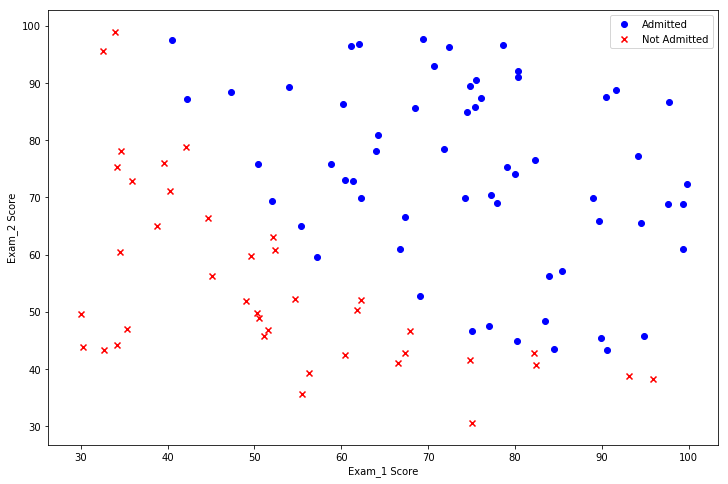

In [5]:
positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]

plt.figure(figsize=(12, 8))
plt.scatter(positive['Exam_1'], positive['Exam_2'], color='blue', marker='o', label='Admitted')
plt.scatter(negative['Exam_1'], negative['Exam_2'], color='red', marker='x', label='Not Admitted')
plt.legend()
plt.xlabel('Exam_1 Score')
plt.ylabel('Exam_2 Score')
plt.show()

## 3.2 使用牛顿法

<font size=4>
&emsp;&emsp;根据前面的公式推导和计算，我们已经知道逻辑回归的梯度和Hessian矩阵为：
</font>

<font size=4>
$$\frac{\partial{J(\theta)}}{\partial{\theta}}=\frac{1}{m}X^T(h_{\theta}(X)-\vec{y})$$
</font>

<font size=4>
$$ H = \frac{1}{m}X^TWX $$
</font>

<font size=4>
&emsp;&emsp;其中，矩阵W是一个 m×m 的对角矩阵，主对角线上的元素为 $h_{\theta}(x^{(k)})(1-h_{\theta}(x^{(k)}))$ (k=1,...,m)
</font>

<font size=4>
&emsp;&emsp;本次实现的牛顿法并没有引入步长因子。
</font>

In [6]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [7]:
def initializeWithZeros(dim):
    return np.zeros((dim, 1))

In [8]:
def computeCost(X, y, theta):
    first = np.multiply(-y, np.log(sigmoid(X @ theta)))
    second = np.multiply(1 - y, np.log(1-sigmoid(X @ theta)))
    return np.mean(first - second)

In [9]:
def newtonMethod(X, y, theta, epsilon, iters):
    m = X.shape[0]
    initialCost = computeCost(X, y, theta)
    costs = []
    costs.append(initialCost)
    
    for i in range(iters):
        h_theta = sigmoid(X @ theta)
        gradient = np.dot(X.T, h_theta - y) / m
        Hessian = (X.T @ np.diag(np.multiply(h_theta, 1-h_theta).reshape(-1, )) @ X) / m
        theta = theta - np.linalg.inv(Hessian) @ gradient
        cost = computeCost(X, y, theta)
        
        if costs[-1] - cost < epsilon:
            break
        costs.append(cost)
        
        
        print('第{iters}轮:{cost}'.format(iters=i, cost=costs[i]))
            
    return theta, costs

In [10]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return (prob >= 0.5).astype(int)

In [11]:
X, y = loadData(data)
epsilon = 0.0000000001
iters = 20
theta = initializeWithZeros(X.shape[1])
theta, costs = newtonMethod(X, y, theta, epsilon, iters)

第0轮:0.6931471805599453
第1轮:0.3314730142682158
第2轮:0.24786698154860518
第3轮:0.2138704674858384
第4轮:0.2044686106741622
第5轮:0.2035108040369588
第6轮:0.2034977045143185


## 3.3 查看模型结果以及绘制决策边界

In [12]:
# 查看模型结果
y_pred = predict(X, theta)
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



<font size=4>
&emsp;&emsp;决策边界的方程为 $\theta^TX=0$。在本节中，决策边界的方程为 $\theta_0+\theta_1x_1+\theta_2x_2=0$。于是
</font>

<font size=4>
$$x_2 = -\frac{\theta_0}{\theta_2}-\frac{\theta_1x_1}{\theta_2}$$
</font>

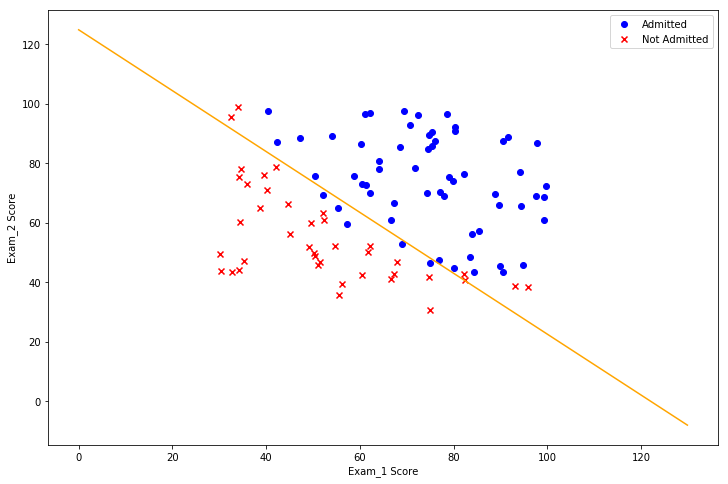

In [13]:
# 绘制决策边界
coef = - (theta / theta[2])

x1 = np.arange(130, step=0.1)
x2 = coef[0] + coef[1]*x1

positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]
plt.figure(figsize=(12, 8))
plt.scatter(positive['Exam_1'], positive['Exam_2'], color='blue', marker='o', label='Admitted')
plt.scatter(negative['Exam_1'], negative['Exam_2'], color='red', marker='x', label='Not Admitted')
plt.plot(x1, x2, color='orange')
plt.legend()
plt.xlabel('Exam_1 Score')
plt.ylabel('Exam_2 Score')
plt.show()

## 3.4 小结

<font size=4>
&emsp;&emsp;牛顿法对于迭代次数要求不高，大约需要5-15次，但是牛顿法每次迭代的复杂度是 $O(n^3)$。与梯度下降法相比，梯度下降法对迭代次数要求很高，但是每次迭代的复杂度是 $O(n)$。所以，在选择数值优化算法进行凸优化的时候，当 $n<1000$ 时，我们优先选用牛顿法，当 $n>1000$ 时，我们选择梯度下降法。 
</font>